In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
#data

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
X, y = df.drop(['target'], axis=1), df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

Normalize

In [6]:
m = X.mean()
s = X.std()
X_train = (X_train - m)/s
X_test  = (X_test  - m)/s

In [7]:
X_train = torch.FloatTensor(X_train.values)
X_test  = torch.FloatTensor(X_test.values)

In [8]:
y_train = torch.LongTensor(y_train.values)
y_test  = torch.LongTensor( y_test.values)

Network

In [9]:
y.nunique()

3

In [10]:
torch.manual_seed(42)
np.random.seed(42)

In [12]:
model = nn.Sequential(
    nn.Linear(X.shape[1], 30),
    nn.Sigmoid(),
    nn.Linear(30, 40),
    nn.Sigmoid(),
    nn.Linear(40, 3)
)

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-2)

In [14]:
def train(num_epoch):
    train_losses = []
    test_losses = []
    for i in range(num_epoch):
        model.train(True)
        #Loss
        y_pred = model(X_train)
        train_loss = loss_fn(y_pred, y_train)
        train_losses.append( float(train_loss) )
        #zero grad
        optimizer.zero_grad()
        #back prop
        train_loss.backward()
        #update weigths
        optimizer.step()

        model.train(False)
        y_pred = model(X_test)
        test_loss = loss_fn(y_pred, y_test)
        test_losses.append( float(test_loss) )

    return train_losses, test_losses 

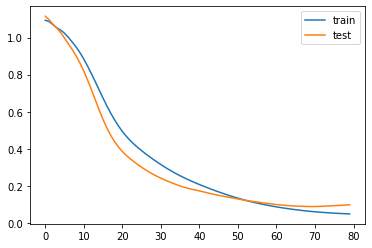

In [15]:
train_losses, test_losses = train(80)
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()

Predictions

In [16]:
y_pred1 = np.argmax( model(X_test).detach().numpy(), axis=1 )
y_test1 = y_test.numpy()

In [17]:
((y_pred1 == y_test1).sum())/y_pred1.size

0.9473684210526315